In [1]:
import cv2
import os
import random
random.seed(255)
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    # adjustment for histograms
    if kwargs.get("is_histogram", False):
        plt.figure(figsize=figsize)
        plt.plot(image)
    else:
        width=image.shape[1] 
        height=image.shape[0]
        margin=50 
        # dots per inch
        dpi=100.
        # inches
        figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
        #axes ratio
        left = margin/dpi/figsize[0] 
        bottom = margin/dpi/figsize[1]
        fig = plt.figure(figsize=figsize, dpi=dpi)
        fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
        _ = plt.imshow(image, cmap=cmap)
        plt.axis("off")
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    plt.show()
    
def display_histogram(histograms, figsize=(6, 6), **kwargs):
    plt.figure(figsize=figsize)
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    for h, c in histograms:
        plt.plot(h, color=c)
    plt.show()
    
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]
    
    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image
    
    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))
    # resize the image
    resized = cv2.resize(image, dim, interpolation=inter)
    # return the resized image
    return resized

### Distance Finder Revisited 

In [35]:
image = cv2.imread("images/ref_24in.jpg")
image = resize(image, height=700)
image.shape
#display(image)

(700, 525, 3)

In [36]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 35, 125)

In [39]:
# find contours
contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
marker = None
print(len(contours))
for c in contours:
    # find perimeter
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*perimeter, True)
    
    # because we know marker has 4 vertices
    if len(approx) == 4:
        # get bounding box
        (x, y, w, h) = cv2.boundingRect(approx)
        aspect_ratio = w/float(h)
        
        # based on initial aspect ratio check if it's our marker
        if aspect_ratio > 0.9 and aspect_ratio < 1.1:
            marker = (x, y, w, h)
            break
marker

648


(195, 200, 101, 103)

195 200 101 103


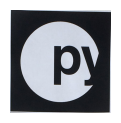

In [40]:
# now we got our dimensions of marker

x, y, w, h = marker
print(x, y, w, h)

display(image[y:y+h, x:x+w])

#### TODO